# **IMPORTADO DE MÓDULOS/FUNCIONES**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [10]:
from functions import normalize_by_max, simpsons_rule_array

# **LOAD PULSES**

In [11]:
Nev_Co60 = 200000  #Nùmero de eventos en las prácticas del máster
Nev_Na22 = 150000
Nt = 600
Nc = 2

In [12]:
#pulsos_Co60 = np.zeros((Nev_Co60,Nt,Nc))
#
#with open('/home/josea/PracticaTimingDigital/pulsoCo60', 'rb') as file:
#  for i in range(Nev_Co60):
#    for j in range(Nt):
#      try:
#        pulsos_Co60[i,j, :] = np.fromfile(file, dtype=np.float32, count = 2)
#      except EOFError:
#        break
#
#    a1, a2 = np.fromfile(file, dtype=np.float32, count=2)

In [13]:
#np.savez_compressed('/home/josea/PracticaTimingDigital/pulsoCo60', data = pulsos_Co60)

In [14]:
data = np.load('/home/josea/PracticaTimingDigital/pulsoCo60.npz')
data = data['data']

#data = np.load('/home/josea/PracticaTimingDigital/pulsoNa22.npz')
#data = data['data']

In [15]:
#fichero_28 = np.fromfile('/home/josea/DEEP_TIMING/datos_Alba/fuentes_50k_Alba/co-2cm-8cm.dat', dtype='float32')
#fichero_55 = np.fromfile('/home/josea/DEEP_TIMING/datos_Alba/fuentes_50k_Alba/co-5cm-5cm.dat', dtype='float32')
#fichero_82 = np.fromfile('/home/josea/DEEP_TIMING/datos_Alba/fuentes_50k_Alba/co-8cm-2cm.dat', dtype='float32')
#
#Nt2 = 600
#Nev = 50000
#Nc = 2
#V28 = fichero_28[0:Nt2*Nev*Nc].reshape((Nev,Nt2,Nc))
#V55 = fichero_55[0:Nt2*Nev*Nc].reshape((Nev,Nt2,Nc))
#V82 = fichero_82[0:Nt2*Nev*Nc].reshape((Nev,Nt2,Nc))
#
#data = V55

# **CALIBRATE**

In [25]:
# Calcualte energies
energy_dec0 = simpsons_rule_array(data[:,50:550,0],1) 
energy_dec1 = simpsons_rule_array(data[:,50:500,1],1)

In [84]:
# Photopeak energies
gamma1 = 1332.5
gamma2 = 1173.2


# Calculate Calibration factors
histogE, binsE = np.histogram(energy_dec0, bins = 500, range = [0,200]);
index_gamma1_dec0 = find_peaks(histogE, height = 500)[0][-1]
index_gamma2_dec0 = find_peaks(histogE, height = 500)[0][-2]
pos_gamma1_dec0 = (binsE[index_gamma1_dec0+1]+binsE[index_gamma1_dec0])/2
pos_gamma2_dec0 = (binsE[index_gamma2_dec0+1]+binsE[index_gamma2_dec0])/2
m_dec0 = (gamma1 - gamma2)/(pos_gamma1_dec0 - pos_gamma2_dec0)
calibrado_dec0 = m_dec0*(energy_dec0 - pos_gamma2_dec0) + gamma2   # Linear calibration


histogE, binsE = np.histogram(energy_dec1, bins = 500, range = [0,200]);
index_gamma1_dec1 = find_peaks(histogE, height = 500)[0][-1]
index_gamma2_dec1 = find_peaks(histogE, height = 500)[0][-2]
pos_gamma1_dec1 = (binsE[index_gamma1_dec1+1]+binsE[index_gamma1_dec1])/2
pos_gamma2_dec1 = (binsE[index_gamma2_dec1+1]+binsE[index_gamma2_dec1])/2
m_dec1 = (gamma1 - gamma2)/(pos_gamma1_dec1 - pos_gamma2_dec1)
calibrado_dec1 = m_dec1*(energy_dec1 - pos_gamma2_dec1) + gamma2


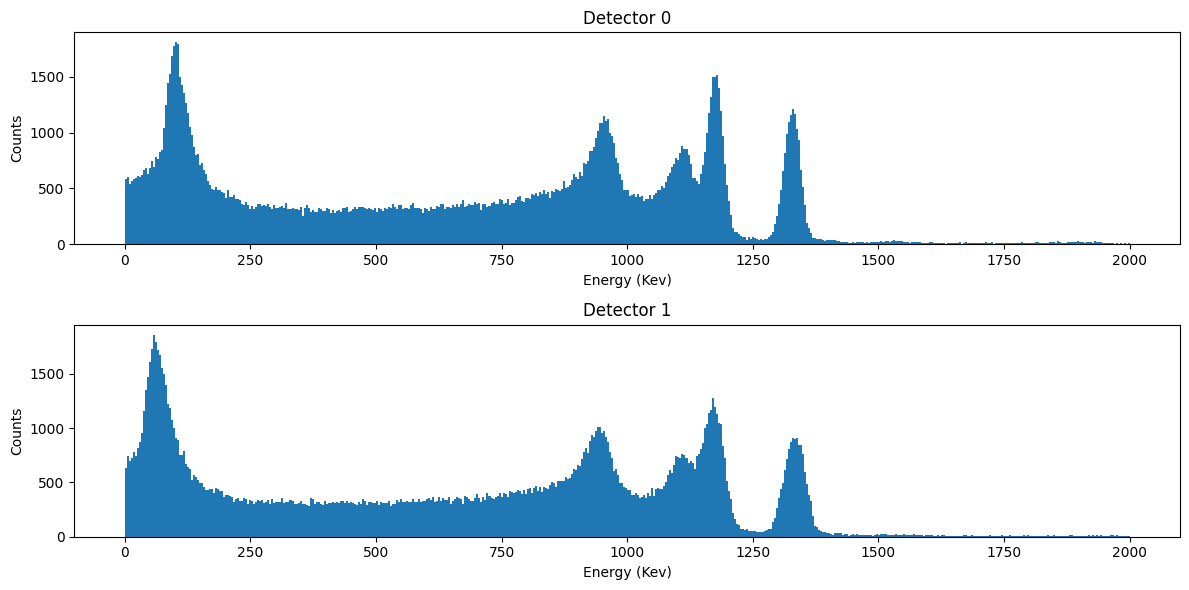

In [85]:
# Plot spectra
plt.figure(figsize = (12,6))
plt.subplot(211)
plt.hist(calibrado_dec0, bins = 500, range = [0,2000]);
plt.xlabel('Energy (Kev)')
plt.ylabel('Counts')
plt.title('Detector 0')

plt.subplot(212)
plt.hist(calibrado_dec1, bins = 500, range = [0,2000]);
plt.xlabel('Energy (Kev)')
plt.ylabel('Counts')
plt.title('Detector 1')

plt.tight_layout() #Prevent titles from superposing

# **ENERGY FILTERING**

In [86]:
#Define energy gates
gate_min_dec0_gamma1 = 1300
gate_max_dec0_gamma1 = 1360
gate_min_dec0_gamma2 = 1140
gate_max_dec0_gamma2 = 1205

gate_min_dec1_gamma1 = 1300
gate_max_dec1_gamma1 = 1360
gate_min_dec1_gamma2 = 1140
gate_max_dec1_gamma2 = 1200

## **DETECTOR 0: 1332 KeV - DETECTOR 1: 1173 KeV**

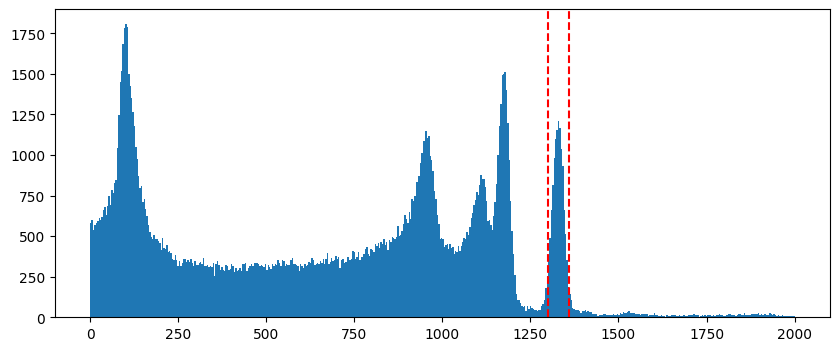

In [87]:
plt.figure(figsize = (10,4))
plt.hist(calibrado_dec0, bins = 500, range = [0,2000]);
plt.axvline(x = gate_min_dec0_gamma1, color = 'r', linestyle = '--')
plt.axvline(x = gate_max_dec0_gamma1, color = 'r', linestyle = '--')

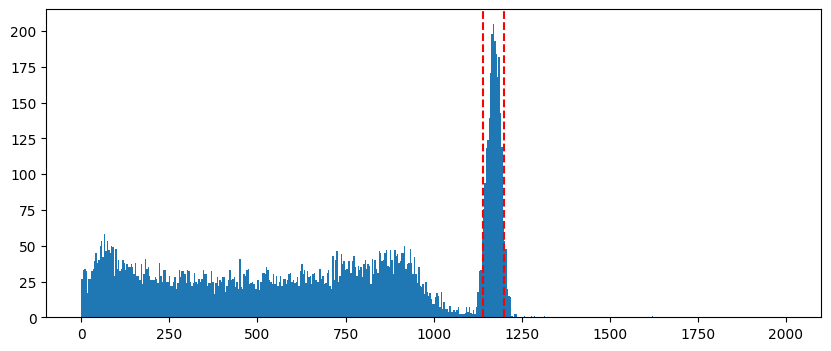

In [88]:
calibrado_dec1_comb1 = calibrado_dec1[(calibrado_dec0 > gate_min_dec0_gamma1)  & (calibrado_dec0 < gate_max_dec0_gamma1)]

plt.figure(figsize = (10,4))
plt.hist(calibrado_dec1_comb1, bins = 500, range = [0,2000])
plt.axvline(x = gate_min_dec1_gamma2, color = 'r', linestyle = '--')
plt.axvline(x = gate_max_dec1_gamma2, color = 'r', linestyle = '--')

## **DETECTOR 1: 1332 KeV - DETECTOR 0: 1173 Kev**

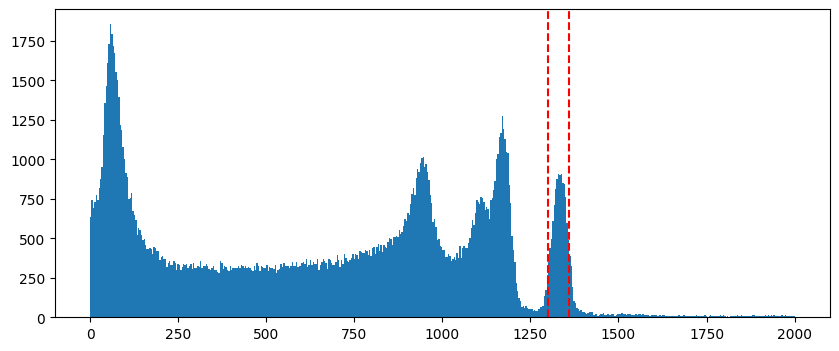

In [89]:
plt.figure(figsize = (10,4))
plt.hist(calibrado_dec1, bins = 500, range = [0,2000])
plt.axvline(x = gate_min_dec1_gamma1, color = 'r', linestyle = '--')
plt.axvline(x = gate_max_dec1_gamma1, color = 'r', linestyle = '--')

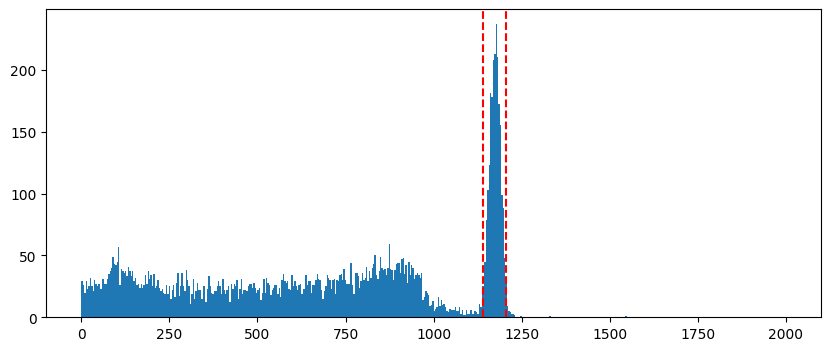

In [90]:
calibrado_dec0_comb2 = calibrado_dec0[(calibrado_dec1 > gate_min_dec1_gamma1)  & (calibrado_dec1 < gate_max_dec1_gamma1)]

plt.figure(figsize = (10,4))
plt.hist(calibrado_dec0_comb2, bins = 500, range = [0,2000]);
plt.axvline(x = gate_min_dec0_gamma2, color = 'r', linestyle = '--')
plt.axvline(x = gate_max_dec0_gamma2, color = 'r', linestyle = '--')

# **NORMALIZE**

In [94]:
data_filt_comb1 = data[(calibrado_dec0 > gate_min_dec0_gamma1)  & (calibrado_dec0 < gate_max_dec0_gamma1),:,:]
data_filt_comb1 = data_filt_comb1[(calibrado_dec1_comb1  > gate_min_dec1_gamma2)  & (calibrado_dec1_comb1 < gate_max_dec1_gamma2),:,:]
data_filt_comb2 = data[(calibrado_dec1 > gate_min_dec1_gamma1)  & (calibrado_dec1 < gate_max_dec1_gamma1),:,:]
data_filt_comb2 = data_filt_comb2[(calibrado_dec0_comb2  > gate_min_dec0_gamma2)  & (calibrado_dec0_comb2  < gate_max_dec0_gamma2),:,:]

data_filt = np.concatenate((data_filt_comb1, data_filt_comb2), axis = 0)
#data_filt = data_filt_comb1
print(data_filt.shape)

#------------------------------------------------------- Normalizar Pulsos ------------------------------------------------------------------------------------
data_filt_norm = normalize_by_max(data_filt, fit_polynomial = True)

(4355, 600, 2)


# **CHECK FOR OUTLIERS**

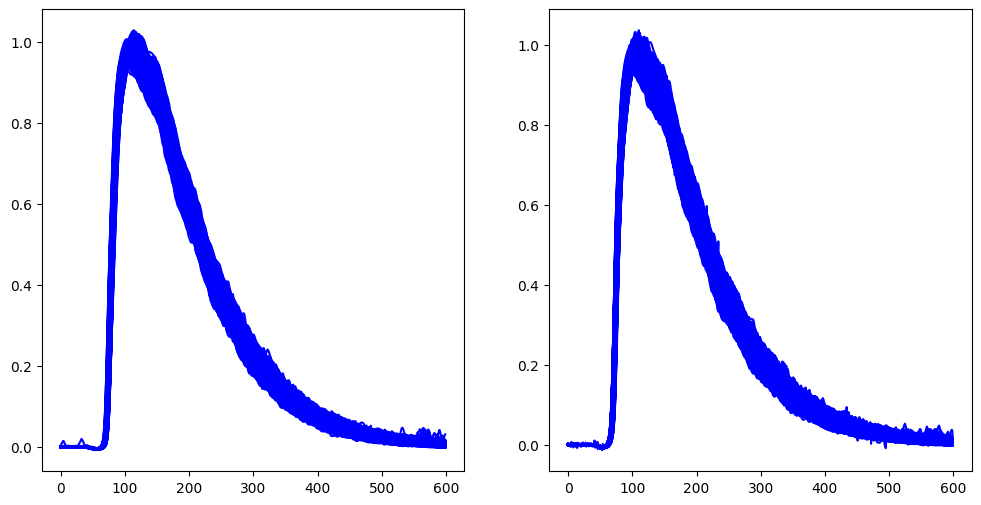

In [117]:
#data_filt_norm = np.delete(data_filt_norm, [8613, 10843, 17162, 75, 15604, 19638, 20079, 21888, 8539], axis = 0)
data_filt_norm = np.delete(data_filt_norm, [4062], axis = 0)

# Con el plot se ve si hay algún pulso que empiece mal/que no cuadre con el otro detector
a_dec0 = []
a_dec1 = []
plt.figure(figsize = (12,6))
for i in range(data_filt_norm.shape[0]):
  plt.subplot(121)
  plt.plot(data_filt_norm[i,:,0], 'b-')
  plt.subplot(122)
  plt.plot(data_filt_norm[i,:,1], 'b-')
  a_dec0.append(np.where(data_filt_norm[i,:,0] == np.max(data_filt_norm[i,:,0]))[0][0])
  a_dec1.append(np.where(data_filt_norm[i,:,1] == np.max(data_filt_norm[i,:,1]))[0][0])
a_dec0 = np.array(a_dec0)
a_dec1 = np.array(a_dec1)

In [118]:
#np.savez_compressed('/home/josea/PRUEBA_Co60', data = data_filt_norm)